In [191]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python.exe -m pip install --upgrade pip' command.


In [192]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python.exe -m pip install --upgrade pip' command.


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (5, 5)

In [194]:
data=pd.read_csv(r"C:\Users\Manoj Gaikwad\Downloads\Stroke-Risk-Prediction-using-Machine-Learning-master\Stroke-Risk-Prediction-using-Machine-Learning-master\dataset\healthcare-dataset-stroke-data - Copy.csv")

In [195]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status,stroke,Type_of_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,1,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,1,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,1,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,1,0,0


# Exploratory data analysis

In [196]:
data.shape

(5110, 14)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  Covid_status       5110 non-null   int64  
 12  stroke             5110 non-null   int64  
 13  Type_of_stroke     5110 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 559.0+ KB


In [198]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
Covid_status         0
stroke               0
Type_of_stroke       0
dtype: int64

# Lets fill Null Values

In [199]:
data['bmi'].value_counts()

0.0     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 419, dtype: int64

In [200]:
data['bmi'].describe()

count    5110.000000
mean       27.756732
std         9.529497
min         0.000000
25%        22.900000
50%        27.700000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [201]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [202]:
data['bmi'].describe()

count    5110.000000
mean       27.756732
std         9.529497
min         0.000000
25%        22.900000
50%        27.700000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [203]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
Covid_status         0
stroke               0
Type_of_stroke       0
dtype: int64

In [204]:
data.drop('id',axis=1,inplace=True)

In [205]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status,stroke,Type_of_stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,1,0,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,1,0,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,1,0,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,1,0,0


# Outlier Removation

In [206]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

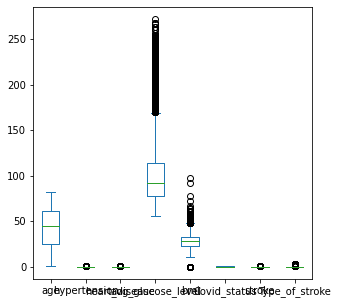

In [207]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [208]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status,stroke,Type_of_stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1


In [209]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [210]:
gender=enc.fit_transform(data['gender'])

In [211]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [212]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])


In [213]:
data['work_type']=work_type

In [214]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender


In [215]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status,stroke,Type_of_stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,1,1
1,0,61.0,0,0,1,3,0,202.21,0.0,2,1,0,0
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,1,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,0.0,2,1,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,1,0,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,1,0,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,1,0,0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  Covid_status       5110 non-null   int64  
 11  stroke             5110 non-null   int64  
 12  Type_of_stroke     5110 non-null   int64  
dtypes: float64(3), int32(5), int64(5)
memory usage: 419.3 KB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [217]:
X=data.drop('Type_of_stroke',axis=1)
X = X.drop('stroke',axis=1)

In [218]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,0.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [219]:
Y=data['Type_of_stroke']

In [220]:
Y

0       1
1       0
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: Type_of_stroke, Length: 5110, dtype: int64

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [222]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status
2285,1,49.0,0,0,1,2,0,79.64,0.0,3,0
4733,1,67.0,0,0,1,2,0,83.16,25.5,1,0
3905,1,78.0,0,0,1,2,1,208.85,24.4,1,0
4700,1,47.0,0,0,1,2,0,110.14,30.5,3,0
4939,0,59.0,0,0,1,2,1,71.08,28.1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.0,1,0
3441,0,59.0,0,0,1,3,1,90.06,28.9,3,1
1344,1,47.0,0,0,1,2,0,86.37,39.2,3,1
4623,1,25.0,0,0,1,0,1,166.38,23.1,2,0


In [223]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: Type_of_stroke, Length: 4088, dtype: int64

In [224]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status
2413,0,58.00,0,0,1,2,0,100.42,39.5,3,0
1141,1,57.00,0,0,1,2,0,90.06,29.8,0,0
146,1,65.00,0,0,1,3,1,68.43,0.0,1,0
3883,0,1.64,0,0,0,4,1,69.89,18.1,0,0
1044,0,79.00,0,0,1,0,1,93.89,30.4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.9,1,0
4712,1,57.00,0,0,1,2,1,93.04,29.2,2,0
4971,0,63.00,0,0,1,2,1,57.06,37.9,2,1
2224,1,57.00,0,0,1,2,0,76.28,31.4,1,0


In [225]:
Y_test

2413    0
1141    0
146     0
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: Type_of_stroke, Length: 1022, dtype: int64

# Normalize

In [226]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Covid_status,stroke,Type_of_stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,27.756732,1.376908,0.404110,0.040900,0.093151
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,9.529497,1.071534,0.490767,0.198078,0.478478
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,22.900000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,27.700000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,1.000000,0.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000,3.000000


In [227]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [228]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [229]:
import pickle
import os


In [230]:
scaler_path=os.path.join('C:/Users/Manoj Gaikwad/Downloads/Stroke-Risk-Prediction-using-Machine-Learning-master/Stroke-Risk-Prediction-using-Machine-Learning-master/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [231]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -2.9091808 ,
         1.51158251, -0.83147635],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.23258338,
        -0.35191245, -0.83147635],
       [ 1.19359699,  1.5325008 , -0.33069968, ..., -0.34804445,
        -0.35191245, -0.83147635],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ...,  1.2054317 ,
         1.51158251,  1.20268003],
       [ 1.19359699, -0.80738634, -0.33069968, ..., -0.48449844,
         0.57983503, -0.83147635],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.01215772,
         0.57983503,  1.20268003]])

In [232]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ...,  1.23692108,
         1.51158251, -0.83147635],
       [ 1.19359699,  0.60537571, -0.33069968, ...,  0.21876441,
        -1.28365994, -0.83147635],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -2.9091808 ,
        -0.35191245, -0.83147635],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ...,  1.06897771,
         0.57983503,  1.20268003],
       [ 1.19359699,  0.60537571, -0.33069968, ...,  0.38670778,
        -0.35191245, -0.83147635],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.93584624,
        -1.28365994, -0.83147635]])

In [233]:
data.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_

# Training

# Decision Tree

In [234]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [235]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [236]:
dt.feature_importances_

array([0.0475559 , 0.14749382, 0.038579  , 0.01783102, 0.01427048,
       0.04030845, 0.02697037, 0.3284836 , 0.21967562, 0.0944753 ,
       0.02435644])

In [237]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Covid_status'],
      dtype='object')

In [238]:
Y_pred=dt.predict(X_test_std)

In [239]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [240]:
from sklearn.metrics import accuracy_score

In [241]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [242]:
ac_dt

0.9207436399217221

In [243]:
import joblib
model_path=os.path.join('C:/Users/Manoj Gaikwad/Downloads/Stroke-Risk-Prediction-using-Machine-Learning-master/Stroke-Risk-Prediction-using-Machine-Learning-master/','models/dt.sav')
joblib.dump(dt,model_path)

['C:/Users/Manoj Gaikwad/Downloads/Stroke-Risk-Prediction-using-Machine-Learning-master/Stroke-Risk-Prediction-using-Machine-Learning-master/models/dt.sav']

# Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [245]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [246]:
Y_pred_lr=lr.predict(X_test_std)

In [247]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [248]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [249]:
ac_lr

0.949119373776908

# KNN

In [250]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [251]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [252]:
Y_pred=knn.predict(X_test_std)

In [253]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [254]:
ac_knn

0.949119373776908

# Random Forest

In [255]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [256]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [257]:
Y_pred=rf.predict(X_test_std)

In [258]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [259]:
ac_rf

0.949119373776908

In [260]:
ac_knn

0.949119373776908

In [261]:
ac_dt

0.9207436399217221

In [262]:
ac_lr

0.949119373776908

# SVM

In [263]:
from sklearn.svm import SVC

In [264]:
sv=SVC()

In [265]:
sv.fit(X_train_std,Y_train)

SVC()

In [266]:
Y_pred=sv.predict(X_test_std)

In [267]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [268]:
ac_sv

0.949119373776908

In [269]:
ac_lr

0.949119373776908

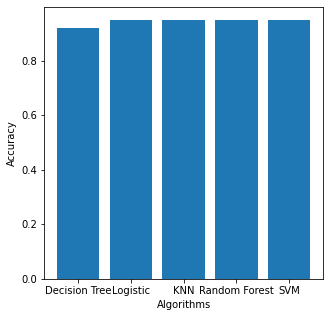

In [270]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [271]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
clean_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
# validate there's no more missing values
miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
Covid_status         0.0
stroke               0.0
Type_of_stroke       0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (5110, 13)


In [272]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': [1 0 2]
Unique 'ever_married': [1 0]
Unique 'work_type': [2 3 0 4 1]
Unique 'Residence_type': [1 0]
Unique 'smoking_status': [1 2 3 0]


In [273]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

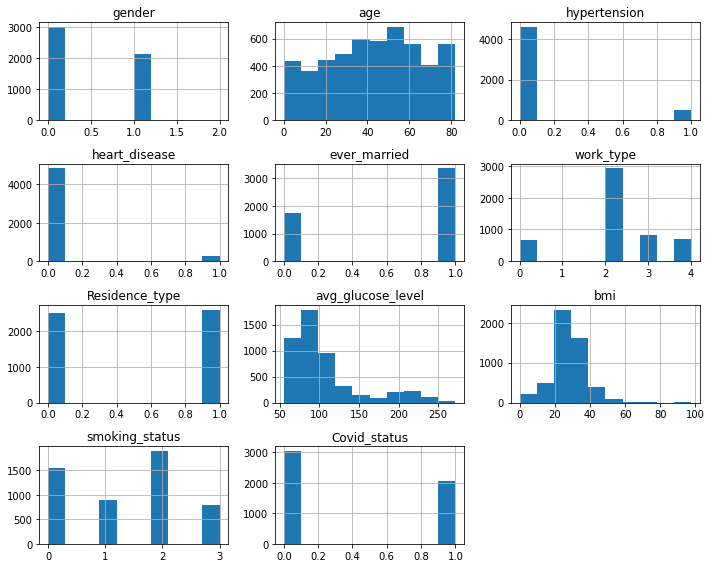

In [274]:
fig = X.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

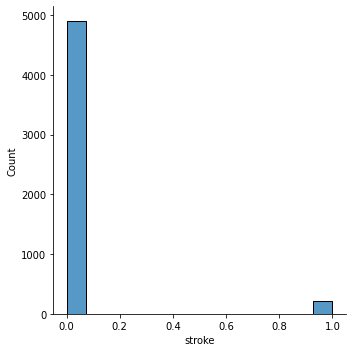

In [275]:
sns.displot(data['stroke'])

In [276]:
z = data['Type_of_stroke']


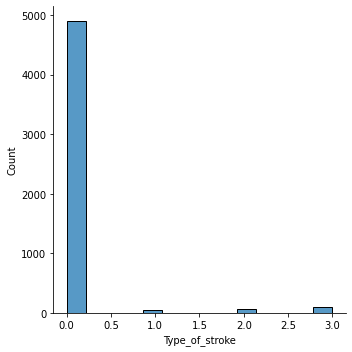

In [277]:
sns.displot(z)

0 FOR NO STROKE
1 FOR ISCHEMIC STROKE
2 FOR SUBARACHNOID STROKE
3 FOR INTRACEREBRAL
